In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError("Gpu not")
print('Gpu found at {} '.format(device_name))

Gpu found at /device:GPU:0 


In [3]:
import pickle
import numpy as np

In [6]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet/
!ls

/content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet
Testing  Training  X_test.pickle  X_train.pickle  Y_test.pickle  Y_train.pickle


In [7]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [8]:
y = np.array(Y_train)

In [9]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import classification_report
from keras.layers.core import Dense, Flatten
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam


import matplotlib.pyplot as plt
import keras.optimizers
import numpy as np
import pandas as pd

In [11]:
#tensorboard = TensorBoard(log_dir=logs , histogram_freq=0,
 #                         write_graph=True, write_images=False)
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logs, histogram_freq=1)
#tb = TensorBoard(logs)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [10]:
def plotGraphs(history,fold_no,epochs):
  %cd '/content/gdrive/MyDrive/Graphs/'
 #summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{fold_no} model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'Vgg16_{epochs}epoch_{fold_no}fold_no_accuracyGraph.png')
  plt.show()
  #summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'{fold_no} model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'Vgg16_{epochs}epoch_{fold_no}fold_no_LossGraph.png')
  plt.show()

553467096/553467096 [==============================] - 3s 0us/step
Epoch 1/100
73/73 [==============================] - 33s 278ms/step - loss: 9.3881 - accuracy: 0.4108 - val_loss: 1.3176 - val_accuracy: 0.3779
Epoch 2/100
73/73 [==============================] - 20s 273ms/step - loss: 1.5426 - accuracy: 0.5333 - val_loss: 14.2861 - val_accuracy: 0.5610
Epoch 3/100
73/73 [==============================] - 20s 275ms/step - loss: 3.0076 - accuracy: 0.3147 - val_loss: 1.3784 - val_accuracy: 0.2896
Epoch 4/100
73/73 [==============================] - 18s 251ms/step - loss: 1.3724 - accuracy: 0.3052 - val_loss: 1.3718 - val_accuracy: 0.2896
Epoch 5/100
73/73 [==============================] - 18s 252ms/step - loss: 1.3653 - accuracy: 0.3052 - val_loss: 1.3666 - val_accuracy: 0.2896
Epoch 6/100
73/73 [==============================] - 18s 253ms/step - loss: 1.3596 - accuracy: 0.3052 - val_loss: 1.3627 - val_accuracy: 0.2896
Epoch 7/100
73/73 [==============================] - 20s 276ms/step 

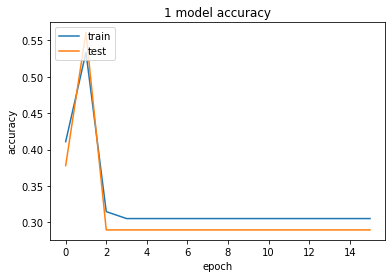

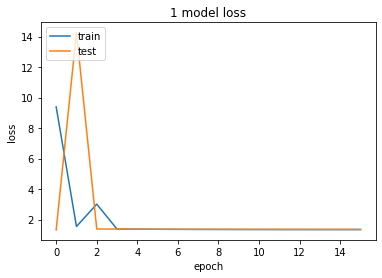

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 1: loss of 1.3390179872512817; accuracy of 27.272728085517883%
49/49 [==============================] - 18s 276ms/step
Classification report on Training data fold-1:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46       928
           1       0.00      0.00      0.00       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.30      3080
   macro avg       0.08      0.25      0.12      3080
weighted avg       0.09      0.30      0.14      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 4s 353ms/step
Classification report on Test data:-1
              precision    recall  f1-score   support

           0       0.30      1.00      0.47       234
           1       0.00      0.00      0.00       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.30       772
   macro avg       0.08      0.25      0.12       772
weighted avg       0.09      0.30      0.14       772



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
73/73 [==============================] - 21s 280ms/step - loss: 15.7450 - accuracy: 0.4610 - val_loss: 1.2429 - val_accuracy: 0.4234
Epoch 2/100
73/73 [==============================] - 18s 254ms/step - loss: 1.3452 - accuracy: 0.4831 - val_loss: 1.1312 - val_accuracy: 0.5078
Epoch 3/100
73/73 [==============================] - 20s 277ms/step - loss: 2.6709 - accuracy: 0.4844 - val_loss: 1.2575 - val_accuracy: 0.3792
Epoch 4/100
73/73 [==============================] - 19s 257ms/step - loss: 1.2574 - accuracy: 0.5299 - val_loss: 10.2471 - val_accuracy: 0.5494
Epoch 5/100
73/73 [==============================] - 19s 257ms/step - loss: 3.0537 - accuracy: 0.4939 - val_loss: 1.2538 - val_accuracy: 0.4857
Epoch 6/100
73/73 [==============================] - 19s 258ms/step - loss: 1.5939 - accuracy: 0.4108 - val_loss: 1.1554 - val_accuracy: 0.4403
Epoch 7/100
73/73 [==============================] - 19s 258ms/step - loss: 1.3400 - accuracy: 0.4026 - val_loss: 1.3861 - val_accurac

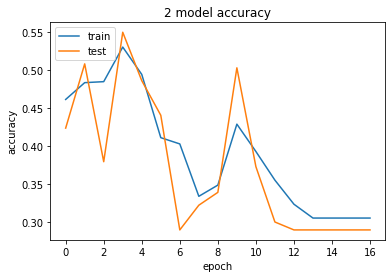

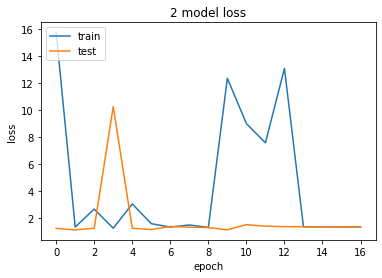

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 2: loss of 1.3546136617660522; accuracy of 29.70779240131378%
49/49 [==============================] - 14s 295ms/step
Classification report on Training data fold-2:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46       928
           1       0.00      0.00      0.00       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.30      3080
   macro avg       0.08      0.25      0.12      3080
weighted avg       0.09      0.30      0.14      3080



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 4s 294ms/step
Classification report on Test data:-2
              precision    recall  f1-score   support

           0       0.30      1.00      0.47       234
           1       0.00      0.00      0.00       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.30       772
   macro avg       0.08      0.25      0.12       772
weighted avg       0.09      0.30      0.14       772



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
73/73 [==============================] - 22s 287ms/step - loss: 7.7772 - accuracy: 0.4766 - val_loss: 1.0391 - val_accuracy: 0.5714
Epoch 2/100
73/73 [==============================] - 21s 282ms/step - loss: 1.4125 - accuracy: 0.5584 - val_loss: 1.0336 - val_accuracy: 0.5961
Epoch 3/100
73/73 [==============================] - 19s 262ms/step - loss: 4.8646 - accuracy: 0.4844 - val_loss: 0.8465 - val_accuracy: 0.6130
Epoch 4/100
73/73 [==============================] - 21s 283ms/step - loss: 0.6015 - accuracy: 0.7710 - val_loss: 0.4843 - val_accuracy: 0.8078
Epoch 5/100
73/73 [==============================] - 19s 262ms/step - loss: 0.3596 - accuracy: 0.8424 - val_loss: 0.3078 - val_accuracy: 0.8584
Epoch 6/100
73/73 [==============================] - 19s 263ms/step - loss: 0.3069 - accuracy: 0.8619 - val_loss: 0.3081 - val_accuracy: 0.8662
Epoch 7/100
73/73 [==============================] - 19s 262ms/step - loss: 0.2718 - accuracy: 0.8766 - val_loss: 0.4301 - val_accuracy:

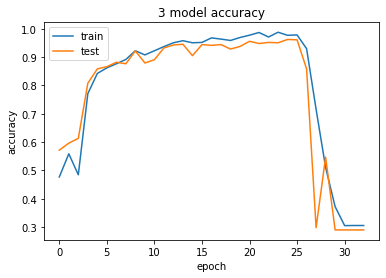

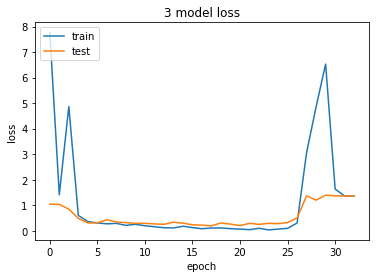

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 3: loss of 1.3557319641113281; accuracy of 32.14285671710968%
49/49 [==============================] - 14s 284ms/step
Classification report on Training data fold-3:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46       928
           1       0.00      0.00      0.00       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.30      3080
   macro avg       0.08      0.25      0.12      3080
weighted avg       0.09      0.30      0.14      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 3s 288ms/step
Classification report on Test data:-3
              precision    recall  f1-score   support

           0       0.30      1.00      0.47       234
           1       0.00      0.00      0.00       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.30       772
   macro avg       0.08      0.25      0.12       772
weighted avg       0.09      0.30      0.14       772



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
73/73 [==============================] - 20s 259ms/step - loss: 26.3273 - accuracy: 0.4329 - val_loss: 1.0021 - val_accuracy: 0.5312
Epoch 2/100
73/73 [==============================] - 19s 255ms/step - loss: 1.0717 - accuracy: 0.5446 - val_loss: 51.1684 - val_accuracy: 0.3052
Epoch 3/100
73/73 [==============================] - 20s 279ms/step - loss: 2.5010 - accuracy: 0.4026 - val_loss: 0.9275 - val_accuracy: 0.5753
Epoch 4/100
73/73 [==============================] - 20s 280ms/step - loss: 1.1059 - accuracy: 0.5506 - val_loss: 0.7944 - val_accuracy: 0.5649
Epoch 5/100
73/73 [==============================] - 20s 280ms/step - loss: 0.7608 - accuracy: 0.6459 - val_loss: 1.0163 - val_accuracy: 0.5935
Epoch 6/100
73/73 [==============================] - 20s 281ms/step - loss: 0.4702 - accuracy: 0.7874 - val_loss: 0.4948 - val_accuracy: 0.7883
Epoch 7/100
73/73 [==============================] - 21s 282ms/step - loss: 0.5188 - accuracy: 0.7944 - val_loss: 0.9966 - val_accurac

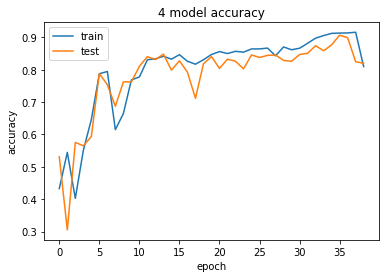

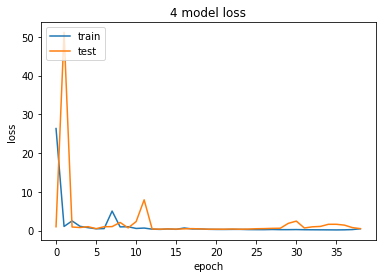

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 4: loss of 0.4222220480442047; accuracy of 82.14285969734192%
49/49 [==============================] - 14s 284ms/step
Classification report on Training data fold-4:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       928
           1       0.99      0.97      0.98       954
           2       0.06      0.01      0.02       410
           3       0.62      0.91      0.74       788

    accuracy                           0.83      3080
   macro avg       0.67      0.72      0.68      3080
weighted avg       0.77      0.83      0.79      3080

13/13 [==============================] - 3s 285ms/step
Classification report on Test data:-4
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       234
           1       1.00      0.99      0.99       238
        

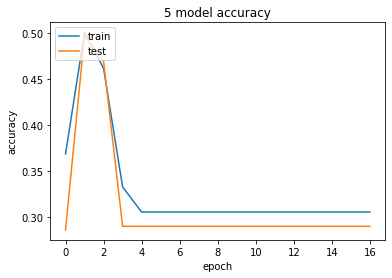

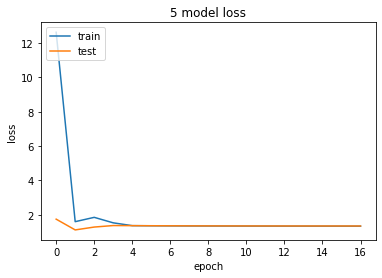

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 5: loss of 1.3298112154006958; accuracy of 31.980520486831665%
49/49 [==============================] - 14s 296ms/step
Classification report on Training data fold-5:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46       928
           1       0.00      0.00      0.00       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.30      3080
   macro avg       0.08      0.25      0.12      3080
weighted avg       0.09      0.30      0.14      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 4s 294ms/step
Classification report on Test data:-5
              precision    recall  f1-score   support

           0       0.30      1.00      0.47       234
           1       0.00      0.00      0.00       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.30       772
   macro avg       0.08      0.25      0.12       772
weighted avg       0.09      0.30      0.14       772

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Validation Loss: 1.3390179872512817 - Validation Accuracy: 27.272728085517883%
------------------------------------------------------------------------
> Fold 2 - Validation Loss: 1.3546136617660522 - Validation Accuracy: 29.70779240131378%
-----------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
inputs = X_train
targets = y
acc_per_fold = []
loss_per_fold = []
num_folds = 5
epochs = 100

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  vgg16_model = vgg16.VGG16(weights='imagenet')
  model = Sequential()

  for layer in vgg16_model.layers[:-3]:
      model.add(layer) 

  for layer in model.layers[0:int(len(model.layers)/2)]:
    layer.trainable = False  # should be False

  for layer in model.layers[int(len(model.layers)/2):]:
    layer.trainable = True  # should be True
    
  model.add(Dense(4,activation = 'softmax'))  
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy']
              )
  
  logs = f'/content/gdrive/MyDrive/Logs/VGG16/vgg16_{epochs}/fold_no_{fold_no}/'
  
  history = model.fit(inputs, targets, batch_size=32, epochs=epochs, validation_split=0.25, callbacks= [TensorBoard
                          (log_dir=logs , histogram_freq=0,
                          write_graph=True, write_images=False), es],
                          use_multiprocessing=True)
  
  plotGraphs(history,fold_no,epochs)
  
  %cd f'/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_{epochs}/'

  hist_df = pd.DataFrame(history.history)  
  hist_csv_file = f'history_{fold_no}.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  y_train_pred = model.predict(X_train, batch_size=64, verbose=1)
  y_train_pred_bool = np.argmax(y_train_pred, axis=1)
  print(f"Classification report on Training data fold-{fold_no}:")
  print(classification_report(y, y_train_pred_bool))

  y_pred = model.predict(X_test, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(f"Classification report on Test data:-{fold_no}")
  print(classification_report(Y_test, y_pred_bool))

  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Validation Loss: {loss_per_fold[i]} - Validation Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------') 

In [ ]:
# testing learning rate code
from keras import optimizers

inputs = X_train
targets = y
acc_per_fold = []
loss_per_fold = []
num_folds = 5
epochs = 100

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  vgg16_model = vgg16.VGG16(weights='imagenet')
  model = Sequential()

  for layer in vgg16_model.layers[:-3]:
      model.add(layer) 

  for layer in model.layers:
    layer.trainable = True
    
  model.add(Dense(4,activation = 'softmax')) 
  
  optm = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False) # <------------------------------------------------------
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optm,
              metrics=['accuracy']
              )
  
  logs = f'/content/gdrive/MyDrive/Colab Notebooks/Logs/temp_logs_vgg16_10epochs/fold_no_{fold_no}/'
  
  history = model.fit(inputs, targets, batch_size=32, epochs=epochs, validation_split=0.25, callbacks= [TensorBoard
                          (log_dir=logs , histogram_freq=0,
                          write_graph=True, write_images=False)],
                          use_multiprocessing=True)
  
  plotGraphs(history,fold_no)
  
  hist_df = pd.DataFrame(history.history)  
  hist_csv_file = f'history_{fold_no}.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Validation Loss: {loss_per_fold[i]} - Validation Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------') 